# Análises de preços de mercado de Ponto de Função para Tecnologia Java.

Estas análise tem por objetivo coletar, analisar estatisticamente e representar análises de preços de pontos de função, com objeto de contrato igual ou similar ao do Contrato 014/2022/SEPLAG, afim de descrever e indicar a vantajosidade financeira do preço do referido contrato com preços praticados no mercado público e privado.

## Importação das biliotecas e pacotes.

In [58]:
import pandas as pd
import numpy as np
import matplotlib as plt

from statistics import mode       # Moda
from statistics import median     # Média
from statistics import mean       # Mediana
from matplotlib import pyplot     # Plot, impressão
from statistics import variance   # Variância
from statistics import stdev      # Desvio padão

## Importação dos dados e transformação em DataFrame do Pandas.

In [99]:
df_precos = pd.DataFrame({'Contratos/ART': ['Serviço Floretal Brasileiro (Item 35)', 'Serviço Floretal Brasileiro (Item 38)', 'Ata Registro de Preços Nº 29/2024 (Item 1)', 'Ata Registro de Preços Nº 29/2024 (Item 15)', 'Ata Registro de Preços Nº 31/2024 (Item 22)', 'ANTT - Contrato Nº 024/2024 (Item 35)', 'ICMBio - Contrato Nº 45/2024 (Item 35)', 'Painel Preços: MIN. Gestão e INV. Serv. Públicos', 'PREGÃO ELETRÔNICO Nº 91180/2024-000 UASG 113205', 'BASIS'],
                          'Preços': [886.51, 886.51, 565.15, 527.00, 886.51, 886.51, 1200.00, 650.00, 1207.18, 1200.00]})

print(df_precos)

                                      Contratos/ART   Preços
0             Serviço Floretal Brasileiro (Item 35)   886.51
1             Serviço Floretal Brasileiro (Item 38)   886.51
2        Ata Registro de Preços Nº 29/2024 (Item 1)   565.15
3       Ata Registro de Preços Nº 29/2024 (Item 15)   527.00
4       Ata Registro de Preços Nº 31/2024 (Item 22)   886.51
5             ANTT - Contrato Nº 024/2024 (Item 35)   886.51
6            ICMBio - Contrato Nº 45/2024 (Item 35)  1200.00
7  Painel Preços: MIN. Gestão e INV. Serv. Públicos   650.00
8   PREGÃO ELETRÔNICO Nº 91180/2024-000 UASG 113205  1207.18
9                                             BASIS  1200.00


## Análises estatísticas descritiva e formatação dos valores.

In [100]:
# Calcular as estatísticas
mediana = df_precos['Preços'].median()
media = df_precos['Preços'].mean()
moda = df_precos['Preços'].mode()[0]  # Pega o primeiro valor da moda (se houver múltiplos)
amplitude = df_precos['Preços'].max() - df_precos['Preços'].min()
variancia = df_precos['Preços'].var()
desvio_padrao = df_precos['Preços'].std()
coeficiente_variacao = (desvio_padrao / media) * 100

# Calcular as separatrizes
quartis = df_precos['Preços'].quantile([0.25, 0.5, 0.75])

# Formatar os resultados para exibição com 2 casas decimais
mediana_formatada = f"{mediana:.2f}"
media_formatada = f"{media:.2f}"
moda_formatada = f"{moda:.2f}"
amplitude_formatada = f"{amplitude:.2f}"
variancia_formatada = f"{variancia:.2f}"
desvio_padrao_formatado = f"{desvio_padrao:.2f}"
coeficiente_variacao_formatado = f"{coeficiente_variacao:.2f}%"

quartis_formatados = {chave: f"{valor:.2f}" for chave, valor in quartis.items()}

# Imprimir os resultados formatados
print(f"Média:  {media_formatada}")
print(f"Mediana:  {mediana_formatada}")
print(f"Moda:  {moda_formatada}")
amplitude_formatada = f"{amplitude:.2f}"
print(f"Amplitude:  {amplitude_formatada}")
print(f"Variância:  {variancia_formatada}")
print(f"Desvio Padrão:  {desvio_padrao_formatado}")
print(f"Coeficiente de Variação:  {coeficiente_variacao_formatado}")

quartis_formatados = {chave: f"{valor:.2f}" for chave, valor in quartis.items()}
print("Separatrizes (Quartis):")
for chave, valor in quartis_formatados.items():
    print(f"  {chave}: {valor}")

Média:  889.54
Mediana:  886.51
Moda:  886.51
Amplitude:  680.18
Variância:  65305.14
Desvio Padrão:  255.55
Coeficiente de Variação:  28.73%
Separatrizes (Quartis):
  0.25: 709.13
  0.5: 886.51
  0.75: 1121.63


## Visualização de dados

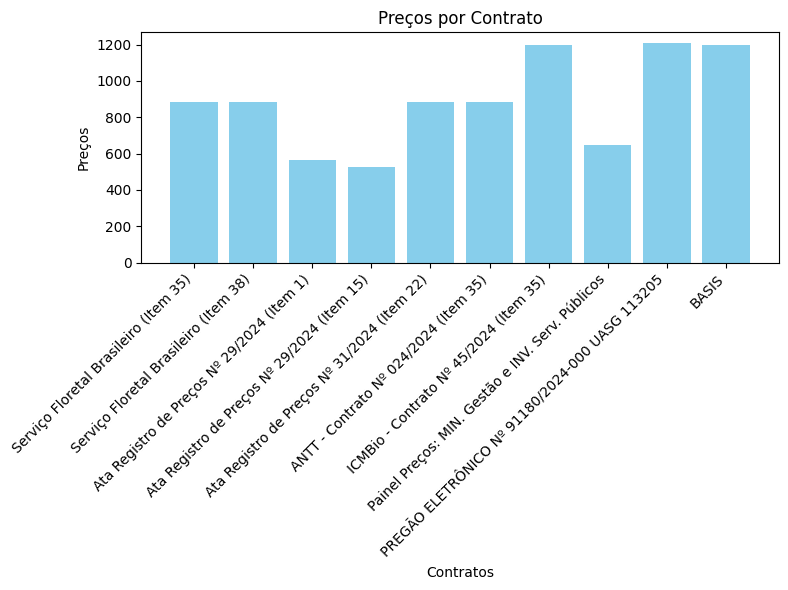

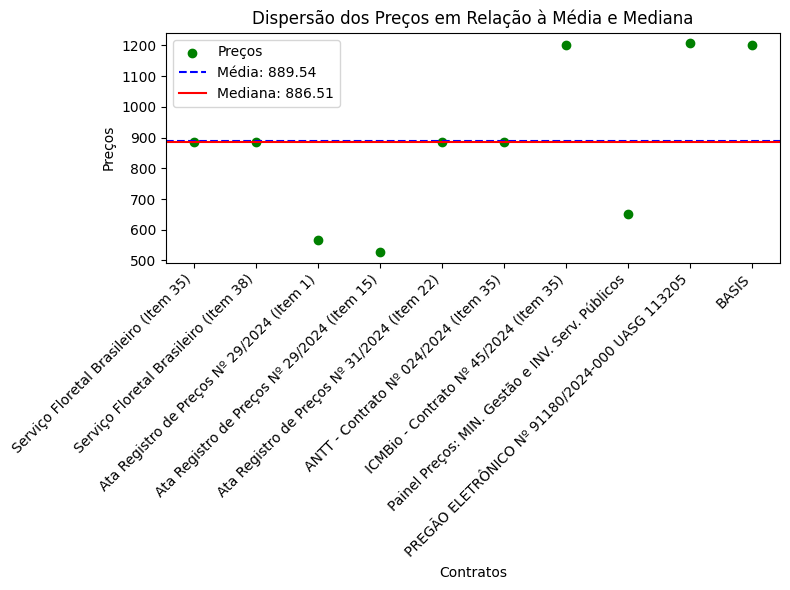

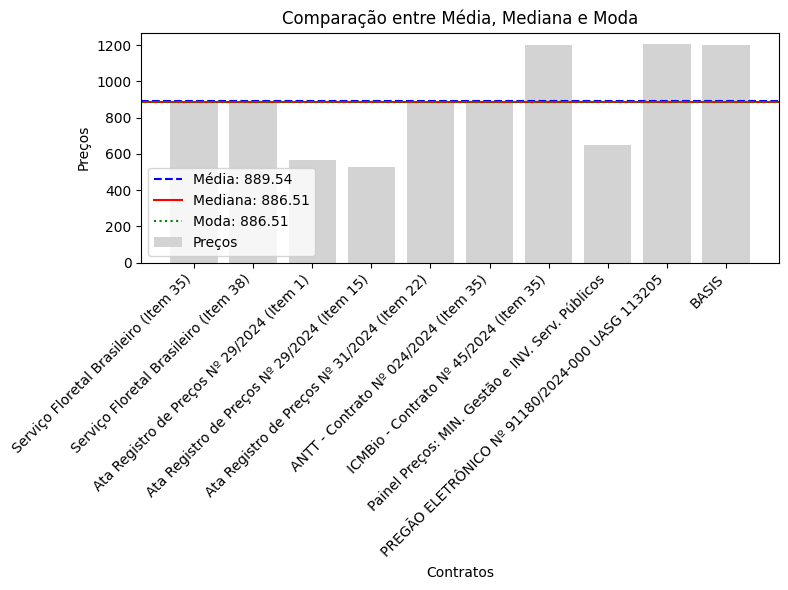

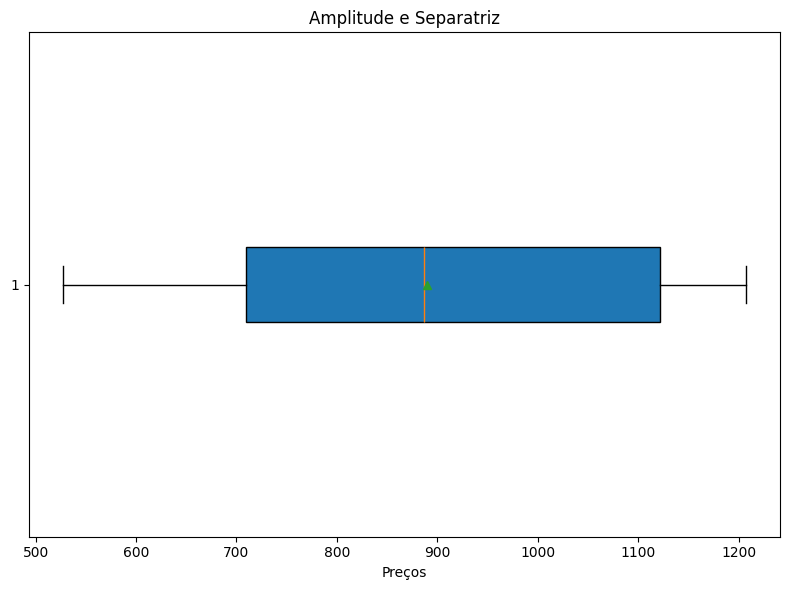

In [104]:
# Salve em imagens em formato png cada um dos gráficos.

# 1- Gráfico de barras com os preços de cada contrato
plt.figure(figsize=(8, 6))
plt.bar(df_precos['Contratos/ART'], df_precos['Preços'], color='skyblue')
plt.xlabel('Contratos')
plt.ylabel('Preços')
plt.title('Preços por Contrato')
plt.xticks(rotation=45, ha='right')  # Rotacionar rótulos do eixo x para melhor legibilidade
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.savefig('grafico_barras.png') # salva o gráfico
plt.show()

# 2- Dispersão dos preços em torno da média com linha que demonstra o valor médio e mediano
plt.figure(figsize=(8, 6))
plt.scatter(df_precos['Contratos/ART'], df_precos['Preços'], color='green', label='Preços')
plt.axhline(y=media, color='blue', linestyle='--', label=f'Média: {media_formatada}')
plt.axhline(y=mediana, color='red', linestyle='-', label=f'Mediana: {mediana_formatada}')
plt.xlabel('Contratos')
plt.ylabel('Preços')
plt.title('Dispersão dos Preços em Relação à Média e Mediana')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.savefig('dispersao_precos.png') # salva o gráfico
plt.show()


# 3- Gráfico que demonstra a média, mediana, e moda em comparação aos preços.
plt.figure(figsize=(8, 6))
plt.bar(df_precos['Contratos/ART'], df_precos['Preços'], color='lightgray', label='Preços')
plt.axhline(y=media, color='blue', linestyle='--', label=f'Média: {media_formatada}')
plt.axhline(y=mediana, color='red', linestyle='-', label=f'Mediana: {mediana_formatada}')
plt.axhline(y=moda, color='green', linestyle=':', label=f'Moda: {moda_formatada}')
plt.xlabel('Contratos')
plt.ylabel('Preços')
plt.title('Comparação entre Média, Mediana e Moda')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.savefig('comparacao_media_mediana_moda.png') # salva o gráfico
plt.show()

# 4- Demonstrar a amplitude e separatrizes
plt.figure(figsize=(8, 6))
plt.boxplot(df_precos['Preços'], vert=False, patch_artist=True, showmeans=True) #showmeans demonstra a média.
plt.title('Amplitude e Separatriz')
plt.xlabel('Preços')
plt.tight_layout()
plt.savefig('amplitude_separatriz.png') # salva o gráfico
plt.show()
